<a href="https://colab.research.google.com/github/YEOWEIHNGWHYELAB/CS3244-Work/blob/main/Copy_of_CS3244_PyTorch_Refresher_Session_1_(Student_Copy%2C_Completed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Machine Learning](https://www.comp.nus.edu.sg/~cs3244/AY22S1/2210-header.png)
---

# PyTorch Refresher

Here, we're covering basic and intermediate level features of `pytorch`. 


> This is a purely TA-led initiative and we appreciate the Profs' guidance and support. 

 The following notebook is meant to give a short introduction to PyTorch basics, and get you setup for writing your own neural networks. PyTorch is an open source machine learning framework that allows you to write your own neural networks and optimize them efficiently. However, PyTorch is not the only framework of its kind. Alternatives to PyTorch include TensorFlow, JAX and Caffe. We choose to teach PyTorch because it is well established, has a huge developer community (originally developed by Facebook), is very flexible and especially used in research. Many current papers publish their code in PyTorch, and thus it is good to be familiar with PyTorch as well. Meanwhile, TensorFlow (developed by Google) is usually known for being a production-grade deep learning library. Still, if you know one machine learning framework in depth, it is very easy to learn another one because many of them use the same concepts and ideas. For instance, TensorFlow’s version 2 was heavily inspired by the most popular features of PyTorch, making the frameworks even more similar. If you are already familiar with PyTorch and have created your own neural network projects, feel free to just skim this notebook.

#Credits

Most part of the notebook is adapted from https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html. 

In [ ]:
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

##The Basics of PyTorch

We will start with reviewing the very basic concepts of PyTorch. As a prerequisite, we recommend to be familiar with the numpy package as most machine learning frameworks are based on very similar concepts. If you are not familiar with numpy yet, don’t worry: here is a tutorial to go through.

So, let’s start with importing PyTorch. The package is called torch, based on its original framework Torch. As a first step, we can check its version:

In [ ]:
import torch
print("Using torch", torch.__version__)

Using torch 1.12.1+cu113


At the time of writing this tutorial (mid of October 2022), the current stable version is 1.12.1. 

As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [ ]:
# Setting the seed
torch.manual_seed(42)

##Tensors

Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for GPU acceleration (more on that later). The name “tensor” is a generalization of concepts you already know. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.

Most common functions you know from numpy can be used on tensors as well. Actually, since numpy arrays are so similar to tensors, we can convert most tensors to numpy arrays (and back) but we don’t need it too often.

##Initialization

Let’s first start by looking at different ways of creating a tensor. There are many possible options, the simplest one is to call [torch.Tensor](https://pytorch.org/docs/stable/tensors.html) passing the desired shape as input argument:

In [ ]:
# create a tensor of shape (2,3,4) 
torch.rand(2, 3, 4)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])

The function [torch.tensor](https://pytorch.org/docs/stable/tensors.html) allocates memory for the desired tensor, but reuses any values that have already been in the memory. To directly assign values to the tensor during initialization, there are many alternatives including:

[torch.zeros](https://pytorch.org/docs/stable/generated/torch.zeros.html): Creates a tensor filled with zeros

[torch.ones](): Creates a tensor filled with ones

<font color='red'>torch.rand</font>: Creates a tensor with random values uniformly sampled between 0 and 1

<font color='red'>torch.randn</font>: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1

<font color='red'>torch.arange</font>: Creates a tensor containing the values 

<font color='red'>torch.Tensor (input list)</font>: Creates a tensor from the list elements you provide

In [ ]:
torch.zeros(2, 3, 4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
# create a 2D tensor with content [[1, 2], [3, 4]]
torch.tensor([[1, 2], [3, 4]])

tensor([[1, 2],
        [3, 4]])

In [ ]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)

You can obtain the shape of a tensor in the same way as in numpy (<font color='red'> x.shape </font>), or using the <font color='red'>.size </font> method:



In [ ]:
# Print shape of X
print(x.shape)


# Print size of x
print(x.size())


# print dimensions of x
dim1, dim2, dim3 = x.shape
print(dim1, dim2, dim3)

torch.Size([2, 3, 4])
torch.Size([2, 3, 4])
2 3 4


## Tensor to Numpy, and Numpy to Tensor

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function <font color='red'> torch.from_numpy </font>:



In [ ]:
# create a numpy array with content [[1, 2], [3, 4]]
np_arr = np.array([[1, 2], [3, 4]])

# create a torch tensor from the numpy array 
torch_tensor = torch.from_numpy(np_arr)
print(torch_tensor)

# Print numpy array and tensor
print(np_arr)
print(torch_tensor)


tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])


To transform a PyTorch tensor back to a numpy array, we can use the function .<font color='red'> numpy() </font> on tensors:



In [ ]:
# create a tensor with content [0, 1, 2, 3]
tensor = torch.tensor([0, 1, 2, 3])

# convert the tensor to numpy array
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU (more on GPU support in a later section). In case you have a tensor on GPU, you need to call .cpu() on the tensor beforehand. Hence, you get a line like np_arr = tensor.cpu().numpy().

##Operations

Most operations that exist in numpy, also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/index.html), but we will review the most important ones here.

The simplest operation is to add two tensors:





In [ ]:
# add two tensors of size (2,4) and (2,4)
x1 = torch.ones(2, 4)
x2 = torch.rand(2, 4)
x3 = x1 + x2


# print all 3 tensors
print('x1', x1)
print('x2', x2)
print('x3', x3)

x1 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
x2 tensor([[0.7539, 0.1952, 0.0050, 0.3068],
        [0.1165, 0.9103, 0.6440, 0.7071]])
x3 tensor([[1.7539, 1.1952, 1.0050, 1.3068],
        [1.1165, 1.9103, 1.6440, 1.7071]])


Calling `x1 + x2` creates a new tensor containing the sum of the two inputs. However, we can also use in-place operations that are applied directly on the memory of a tensor. We therefore change the values of `x2` without the chance to re-accessing the values of `x2` before the operation. An example is shown below:

In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

# in-place add x1 to x2
x2.add_(x1)

# print x1 and x2
print('x1 (after)', x1)
print('x2 (after)', x2)

X1 (before) tensor([[0.6581, 0.4913, 0.8913],
        [0.1447, 0.5315, 0.1587]])
X2 (before) tensor([[0.6542, 0.3278, 0.6532],
        [0.3958, 0.9147, 0.2036]])
x1 (after) tensor([[0.6581, 0.4913, 0.8913],
        [0.1447, 0.5315, 0.1587]])
x2 (after) tensor([[1.3123, 0.8191, 1.5445],
        [0.5406, 1.4462, 0.3624]])


In-place operations are usually marked with a underscore postfix (e.g. “add_” instead of “add”).

Another common operation aims at changing the shape of a tensor. A tensor of size (2,3) can be re-organized to any other shape with the same number of elements (e.g. a tensor of size (6), or (3,2), …). In PyTorch, this operation is called <font color='red'>view</font>:






In [ ]:
# create a tensor with numbers from 1 to 6 (inclusive) using arange
x = torch.arange(1, 7)  # similar to python range()

# print the tensor
print(x)

tensor([1, 2, 3, 4, 5, 6])


In [ ]:
# use view to get a new view of the tensor, transform the shape to (2, 3)
x = x.view(2, 3)

# print tensor
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
x = x.view(6, 1)
print(x)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


In [ ]:
# Swapping dimension 0 and 1
x = x.permute(1, 0)

# print tensor
print(x)

tensor([[1, 2, 3, 4, 5, 6]])


In [ ]:
x = x.view(3, 2)
print(x)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


Other commonly used operations include matrix multiplications, which are essential for neural networks. Quite often, we have an input vector , which is transformed using a learned weight matrix `W`. There are multiple ways and functions to perform matrix multiplication, some of which we list below:


*   <font color='red'>torch.matmul</font>: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting. Can also be written as `a @ b`, similar to numpy.
*   <font color='red'>torch.mm</font>: Performs the matrix product over two matrices, but doesn’t support broadcasting
* <font color='red'>torch.bmm</font>: Performs the matrix product with a support batch dimension. If the first tensor `T` is of shape (`b×n×m`), and the second tensor `R` (`b×m×p`), the output  is of shape (`b×n×p`), and has been calculated by performing  matrix multiplications of the submatrices of `T` and R:O_i=T_i@R_i : 
* <font color='red'>torch.einsum</font>: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention. Explanation of the Einstein sum can be found in assignment 1.


Usually, we use <font color='red'>torch.matmul</font> or <font color='red'>torch.bmm</font>. We can try a matrix multiplication with torch.matmul below.

In [ ]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
# make 3x3 tensor by viewing a tensor made out of arange(9) and store it in W
w = torch.arange(9).view(3, 3)

# print W
print(w)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [ ]:
# multiply x and W and assign the result 
h = torch.matmul(x, w)

# print the output
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


##Indexing

We often have the situation where we need to select a part of a tensor. Indexing works just like in numpy, so let’s try it:

In [ ]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
# print Second column
print(x[:, 1])

tensor([1, 5, 9])


In [ ]:
# First row
print(x[0, :])
print(x[0])

tensor([0, 1, 2, 3])
tensor([0, 1, 2, 3])


In [ ]:
# First two rows, last column
print(x[:2, -1])


tensor([3, 7])


In [ ]:
# Middle two rows
print(x[1:])

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


## Dynamic Computation Graph and Backpropagation

One of the main reasons for using PyTorch in Deep Learning projects is that we can automatically get **gradients/derivatives** of functions that we define. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions. If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our neural network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables ("values"); in that case we talk about **gradients**. It's a more general term.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input. 
PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**. 

> **Note:  Why do we want gradients?** Consider that we have defined a function, a neural net, that is supposed to compute a certain output $y$ for an input vector $\mathbf{x}$. We then define an **error measure** that tells us how wrong our network is; how bad it is in predicting output $y$ from input $\mathbf{x}$. Based on this error measure, we can use the gradients to **update** the weights $\mathbf{W}$ that were responsible for the output, so that the next time we present input $\mathbf{x}$ to our network, the output will be closer to what we want.

The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

In [ ]:
x = torch.ones((3,))
print(x.requires_grad)

False


We can change this for an existing tensor using the function `requires_grad_()` (underscore indicating that this is a in-place operation). Alternatively, when creating a tensor, you can pass the argument `requires_grad=True` to most initializers we have seen above.

In [ ]:
x.requires_grad_(True)
print(x.requires_grad)

True


In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 3\right]$$

You could imagine that $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to obtain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


Now let's build the computation graph step by step. You can combine multiple operations in a single line, but we will separate them here to get a better understanding of how each operation is added to the computation graph.

In [ ]:
a = x + 2
b = a ** 2    # ** means power
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


Using the statements above, we have created a computation graph that looks similar to the figure below:

<center><img src="https://drive.google.com/uc?id=1o2n1C5GFqt8w8aGTu34HiE-C-PmnAzi9"></center>


We calculate $a$ based on the inputs $x$ and the constant $2$, $b$ is $a$ squared, and so on. The visualization is an abstraction of the dependencies between inputs and outputs of the operations we have applied.
Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`. You can see this when we printed the output tensor $y$. This is why the computation graph is usually visualized in the reverse direction (arrows point from the result to the inputs). We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [ ]:
y.backward()

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:

In [ ]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

## GPU support

A crucial feature of PyTorch is the support of GPUs, short for Graphics Processing Unit. A GPU can perform many thousands of small operations in parallel, making it very well suitable for performing large matrix operations in neural networks. When comparing GPUs to CPUs, we can list the following main differences (credit: [Kevin Krewell, 2009](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/)) 

![Picture](https://drive.google.com/uc?id=1tgoUlvkWj5dv1oqfV46c3ABzYK5_dc_z)

CPUs and GPUs have both different advantages and disadvantages, which is why many computers contain both components and use them for different tasks. In case you are not familiar with GPUs, you can read up more details in this [NVIDIA blog post](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/) or [here](https://www.intel.com/content/www/us/en/products/docs/processors/what-is-a-gpu.html). 

GPUs can accelerate the training of your network up to a factor of $100$ which is essential for large neural networks. PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries [CUDA](https://developer.nvidia.com/cuda-zone) and [cuDNN](https://developer.nvidia.com/cudnn)). First, let's check whether you have a GPU available:

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


If you have a GPU on your computer but the command above returns False, make sure you have the correct CUDA-version installed. The `dl2021` environment comes with the CUDA-toolkit 11.3, which is selected for the Lisa supercomputer. Please change it if necessary (CUDA 11.1 is currently common on Colab). On Google Colab, make sure that you have selected a GPU in your runtime setup (in the menu, check under `Runtime -> Change runtime type`). 

By default, all tensors you create are stored on the CPU. We can push a tensor to the GPU by using the function `.to(...)`, or `.cuda()`. However, it is often a good practice to define a `device` object in your code which points to the GPU if you have one, and otherwise to the CPU. Then, you can write your code with respect to this device object, and it allows you to run the same code on both a CPU-only system, and one with a GPU. Let's try it below. We can specify the device as follows: 

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


Now let's create a tensor and push it to the device:

In [ ]:
x = torch.zeros(2, 3)
x = x.to(device) 
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In case you have a GPU, you should now see the attribute `device='cuda:0'` being printed next to your tensor. The zero next to cuda indicates that this is the zero-th GPU device on your computer. PyTorch also supports multi-GPU systems, but this you will only need once you have very big networks to train (if interested, see the [PyTorch documentation](https://pytorch.org/docs/stable/distributed.html#distributed-basics)). We can also compare the runtime of a large matrix multiplication on the CPU with a operation on the GPU:

In [ ]:
import torch
import time

x = torch.randn(10000, 10000)

## CPU version, done on cpu
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version, done on gpu
device = torch.device('cuda')
x = x.to(device)
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 35.23283s
GPU time: 2.82475s


Depending on the size of the operation and the CPU/GPU in your system, the speedup of this operation can be >50x. As `matmul` operations are very common in neural networks, we can already see the great benefit of training a NN on a GPU. The time estimate can be relatively noisy here because we haven't run it for multiple times. Feel free to extend this, but it also takes longer to run.

When generating random numbers, the seed between CPU and GPU is not synchronized. Hence, we need to set the seed on the GPU separately to ensure a reproducible code. Note that due to different GPU architectures, running the same code on different GPUs does not guarantee the same random numbers. Still, we don't want that our code gives us a different output every time we run it on the exact same hardware. Hence, we also set the seed on the GPU:

In [ ]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available(): 
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    
# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = True

## Learning by example: Continuous XOR

If we want to build a neural network in PyTorch, we could specify all our parameters (weight matrices, bias vectors) using `Tensors` (with `requires_grad=True`), ask PyTorch to calculate the gradients and then adjust the parameters. But things can quickly get cumbersome if we have a lot of parameters. In PyTorch, there is a package called `torch.nn` that makes building neural networks more convenient. 

We will introduce the libraries and all additional parts you might need to train a neural network in PyTorch, using a simple example classifier on a simple yet well known example: XOR. Given two binary inputs $x_1$ and $x_2$, the label to predict is $1$ if either $x_1$ or $x_2$ is $1$ while the other is $0$, or the label is $0$ in all other cases. The example became famous by the fact that a single neuron, i.e. a linear classifier, cannot learn this simple function.
Hence, we will learn how to build a small neural network that can learn this function. 
To make it a little bit more interesting, we move the XOR into continuous space and introduce some gaussian noise on the binary inputs. Our desired separation of an XOR dataset could look as follows:

![Picture](https://drive.google.com/uc?id=1xQe00bYFNflLGPg_l9_NVi3P3E2ccl-v)


### The data

PyTorch also provides a few functionalities to load the training and test data efficiently, summarized in the package `torch.utils.data`.

In [ ]:
import torch.utils.data as data

The data package defines two classes which are the standard interface for handling data in PyTorch: `data.Dataset`, and `data.DataLoader`. The dataset class provides an uniform interface to access the training/test data, while the data loader makes sure to efficiently load and stack the data points from the dataset into batches during training.

#### The dataset class

The dataset class summarizes the basic functionality of a dataset in a natural way. To define a dataset in PyTorch, we simply specify two functions: `__getitem__`, and `__len__`. The get-item function has to return the $i$-th data point in the dataset, while the len function returns the size of the dataset. For the XOR dataset, we can define the dataset class as follows:

In [ ]:
import torch.utils.data as data

class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2))
        label = (data.sum(dim=1) == 1).int()

        # To make it slightly more challenging, we add a bit of gaussian noise to the data points. (hint: torch.normal)
        noise = torch.normal(0, self.std, size=((self.size, 2)))
        data = data + noise

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size  # number of data points

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data = self.data[idx]
        label = self.label[idx]
        return data, label 

In [ ]:
# let's check the behavior of torch.randint
size = 10
data = torch.randint(low=0, high=2, size=(size, 2))
print(data)

tensor([[0, 0],
        [1, 1],
        [0, 0],
        [1, 1],
        [0, 0],
        [0, 0],
        [0, 1],
        [1, 1],
        [1, 0],
        [0, 0]])


In [ ]:
(data.sum(dim=1) == 1).int()

tensor([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=torch.int32)

In [ ]:
torch.normal(0, 2, size=((size, 2)))

tensor([[ 0.5595,  2.0895],
        [ 0.5233, -0.2819],
        [-1.8718,  0.0719],
        [-1.2667,  0.8414],
        [ 0.4790,  1.1030],
        [-2.7202, -1.3585],
        [ 3.8952,  2.0711],
        [-0.0659,  1.9248],
        [ 0.8680,  1.2890],
        [ 3.4528, -2.0764]])

Let's try to create such a dataset and inspect it:

In [ ]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([1.1488, 1.0871]), tensor(0, dtype=torch.int32))


To better relate to the dataset, we visualize the samples below. 

In [ ]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

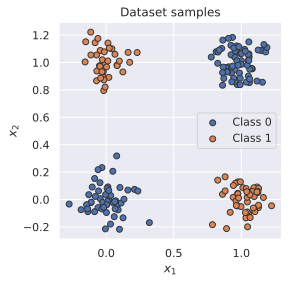

In [ ]:
import matplotlib.pyplot as plt

visualize_samples(dataset.data, dataset.label)
plt.show()

#### The data loader class

The class `torch.utils.data.DataLoader` represents a Python iterable over a dataset with support for automatic batching, multi-process data loading and many more features. The data loader communicates with the dataset using the function `__getitem__`, and stacks its outputs as tensors over the first dimension to form a batch.
In contrast to the dataset class, we usually don't have to define our own data loader class, but can just create an object of it with the dataset as input. Additionally, we can configure our data loader with the following input arguments (only a selection, see full list [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)):

* `batch_size`: Number of samples to stack per batch
* `shuffle`: If True, the data is returned in a random order. This is important during training for introducing stochasticity. 
* `num_workers`: Number of subprocesses to use for data loading. The default, 0, means that the data will be loaded in the main process which can slow down training for datasets where loading a data point takes a considerable amount of time (e.g. large images). More workers are recommended for those, but can cause issues on Windows computers. For tiny datasets as ours, 0 workers are usually faster.
* `pin_memory`: If True, the data loader will copy Tensors into CUDA pinned memory before returning them. This can save some time for large data points on GPUs. Usually a good practice to use for a training set, but not necessarily for validation and test to save memory on the GPU.
* `drop_last`: If True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size. Only potentially helpful during training to keep a consistent batch size.

Let's create a simple data loader below:

In [ ]:
# create a data loader
data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True,   # important parameters: batch_size
                                         num_workers=4, pin_memory=True)    # num_workers affect data loading speed, ideally pin_memory should alway be true

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the 
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

# the error message broken pipe doesn't matter for now, as this example is just
# for illustrative purpopse. later we will learn to use data_loader 
# in the "correct" way

Data inputs torch.Size([1, 2]) 
 tensor([[1.0954, 0.0213]])
Data labels torch.Size([1]) 
 tensor([1], dtype=torch.int32)


Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


#Session Credits
TA Pranavan and TA Ai Bo with the support of Prof Min and Brian

